<a href="https://colab.research.google.com/github/Milad-Tz/MNIST-Object-Localization/blob/main/MNIST_Object_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective of This Notebook

In this notebook, we explore the task of object localization and classification using the MNIST dataset, which consists of handwritten digits from 0 to 9. Our goal is to build and evaluate models that not only classify digits but also localize them within images. We will examine four distinct cases to understand various aspects of object detection and classification.

### Overview of Cases

#### Case 1: Single Class Localization
- **Objective**: To focus on detecting and localizing a single class (e.g., digit '1') within larger images.
- **Data Creation**:
  - **Images**: Create larger images with a single digit (e.g., '1') randomly placed in a black background.
  - **Labels**: For each image, generate bounding box coordinates for the digit and a binary label indicating the presence of the digit.

#### Case 2: Binary Classification and Localization
- **Objective**: To classify whether a digit is present and localize it if present. The dataset will include images with and without digits.
- **Data Creation**:
  - **Images**: Larger images with either one digit, two digits, or a completely empty background.
  - **Labels**:
    - **Presence/Absence**: A binary classification label indicating whether any digit is present.
    - **Bounding Box**: Coordinates for the bounding box around the digit(s), if present.

#### Case 3: Multi-Class Localization
- **Objective**: To detect and localize digits from all 10 classes (0-9) within larger images.
- **Data Creation**:
  - **Images**: Larger images containing one digit from any of the 10 classes, with digits randomly placed on a black background.
  - **Labels**:
    - **Class Label**: The class of the digit present in the image (one-hot encoded).
    - **Bounding Box**: Coordinates for the bounding box around the digit.

#### Case 4: Multi-Class Detection with Multiple Objects
- **Objective**: To handle images that might contain multiple digits from different classes or be empty.
- **Data Creation**:
  - **Images**: Larger images with either:
    - One or two digits from any class.
    - Only one digit.
    - An empty background.
  - **Labels**:
    - **Presence Classification**: A label indicating if there are one or two digits or if the image is empty.
    - **Bounding Boxes**: Coordinates for up to two digits, or empty if no digit is present.

### Data Creation Process

1. **Generating Large Images**:
   - Create larger images (e.g., 128x128 pixels) with a black background.
   - Place smaller MNIST digits at random locations within these larger images.

2. **Creating Labels**:
   - For each image, generate bounding box coordinates for the digits and classify the presence of digits.
   - Use one-hot encoding for multi-class classification where applicable.

3. **Model Training and Evaluation**:
   - Train models to classify and localize digits.
   - Evaluate the performance of these models based on classification accuracy and Intersection over Union (IoU) for bounding box predictions.

This notebook will guide you through the data preparation, model building, training, and evaluation steps, providing insights into solving object localization and classification tasks using the MNIST dataset.


# First Case
We have one class, which represents a specific digit from the MNIST dataset (e.g., digit "1"). Our goal is to create a dataset for object localization by placing this digit randomly within a larger black background image. This setup simulates a simple object detection task where the model needs to predict the position and size of the digit within the larger image.

## Dataset Preparation
1. **Select the Class:** We begin by filtering the MNIST dataset to include only the images of the chosen digit. For this example, let's assume we have selected digit "1".
2. **Create Larger Images:** Each selected digit image, originally of size 28x28, is randomly placed within a larger 64x64 black background image. This process involves:
   - Randomly choosing the top-left corner for placing the digit.
   - Placing the digit within the larger image without altering its original shape or size.
3. **Generate Labels:** For each generated image, we calculate the bounding box coordinates (`x_center, y_center, width, height`) relative to the size of the larger image. These coordinates will serve as the labels for our object localization task.

## Model Architecture
We use a Convolutional Neural Network (CNN) to predict the bounding box coordinates of the digit within the larger image. The CNN consists of:
1. **Convolutional Layers:** Three layers with 16, 32, and 64 filters respectively, each followed by a max-pooling layer to downsample the feature maps.
2. **Dense Layers:** After flattening the output from the convolutional layers, two fully connected layers are used to learn the complex patterns necessary for accurate localization.
3. **Output Layer:** The final layer has 4 units, corresponding to the predicted bounding box coordinates (`x_center, y_center, width, height`).

## Training the Model
The model is trained using the Mean Squared Error (MSE) loss function, which measures the difference between the predicted and true bounding box coordinates. The Adam optimizer is used to minimize the loss during training.

## Evaluation
After training, the model is evaluated on a test set. We visualize the predictions by plotting the real and predicted bounding boxes on random test images. Additionally, the Intersection over Union (IoU) metric is calculated to quantify the overlap between the predicted and true bounding boxes.

## Conclusion
In this first case, we focused on a simple object localization task with one class and a straightforward CNN model. This setup serves as a foundational example of how to approach object detection and localization using deep learning.


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [57]:
# Load the MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Select a single class, e.g., digit "1"
selected_class = 1
selected_images = x_train[y_train == selected_class]

# Define the larger image size and small image size (MNIST)
large_image_size = 64
small_image_size = 28

In [58]:
# Function to randomly place the digit on a black background and return the image and bbox
def place_digit_on_background(digit_image):
    large_image = np.zeros((large_image_size, large_image_size), dtype=np.uint8)
    x_offset = np.random.randint(0, large_image_size - small_image_size)
    y_offset = np.random.randint(0, large_image_size - small_image_size)
    large_image[y_offset:y_offset + small_image_size, x_offset:x_offset + small_image_size] = digit_image

    # Calculate bounding box
    x_center = (x_offset + small_image_size / 2) / large_image_size
    y_center = (y_offset + small_image_size / 2) / large_image_size
    width = small_image_size / large_image_size
    height = small_image_size / large_image_size

    return large_image, [x_center, y_center, width, height]

In [59]:
# Initialize arrays to store the images and labels
num_images = selected_images.shape[0]
images = np.zeros((num_images, large_image_size, large_image_size), dtype=np.float32)
bboxes = np.zeros((num_images, 4), dtype=np.float32)

# Apply the function to all selected images
for i in range(num_images):
    digit_image = selected_images[i]
    image, bbox = place_digit_on_background(digit_image)
    images[i] = image / 255.0  # Normalize the image data to [0, 1]
    bboxes[i] = bbox

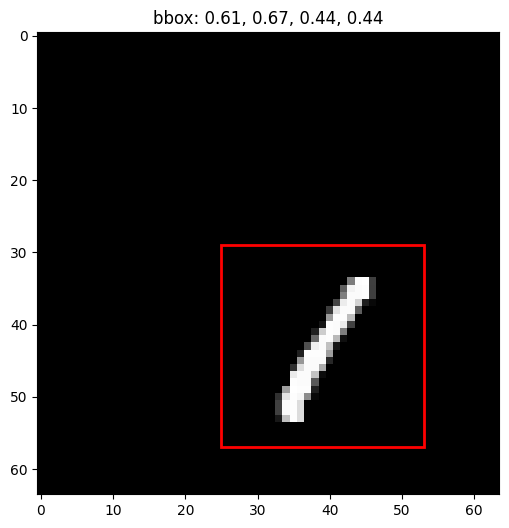

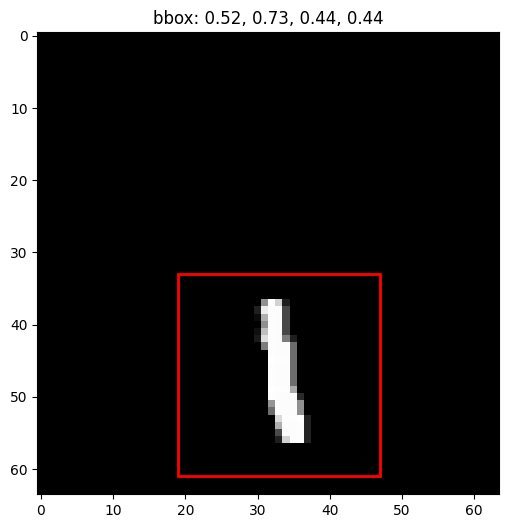

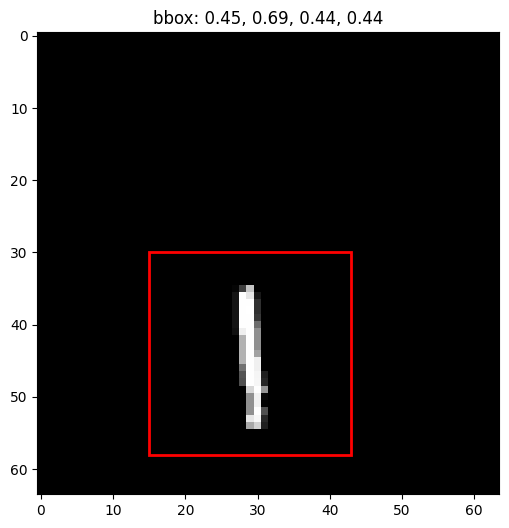

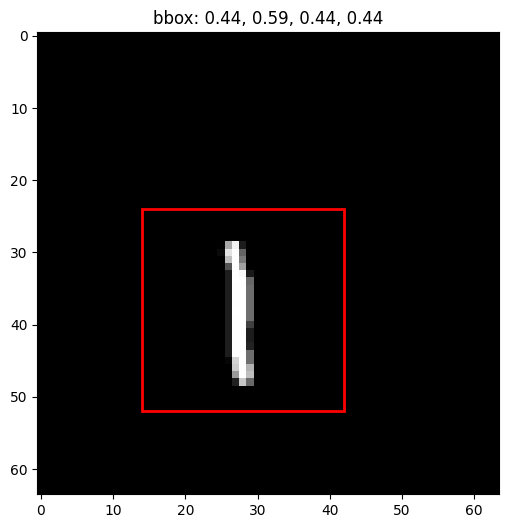

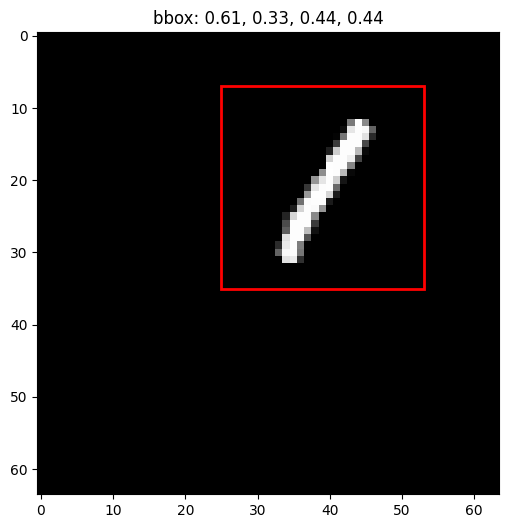

In [60]:
for i in range(5):
    plt.figure(figsize=(6, 6))
    plt.imshow(images[i], cmap='gray')

    # Extract bounding box coordinates from y
    x_center, y_center, width, height = bboxes[i]

    # Convert bounding box coordinates to pixel values
    x_min = int((x_center - width / 2) * large_image_size)
    y_min = int((y_center - height / 2) * large_image_size)
    rect_width = int(width * large_image_size)
    rect_height = int(height * large_image_size)

    # Create a rectangle representing the bounding box
    rect = plt.Rectangle((x_min, y_min), rect_width, rect_height, edgecolor='red', facecolor='none', linewidth=2)
    plt.gca().add_patch(rect)

    # Add title with bounding box coordinates
    plt.title(f"bbox: {x_center:.2f}, {y_center:.2f}, {width:.2f}, {height:.2f}")
    plt.axis('on')
    plt.show()

In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, bboxes, test_size=0.2, random_state=42)

# Reshape the data for the CNN (add channel dimension)
X_train = X_train.reshape(-1, large_image_size, large_image_size, 1)
X_test = X_test.reshape(-1, large_image_size, large_image_size, 1)

In [62]:
# Build the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(large_image_size, large_image_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4)  # Output layer with 4 units: x_center, y_center, width, height
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
135/135 [==============================] - 3s 15ms/step - loss: 0.0071 - val_loss: 3.8633e-04
Epoch 2/10
135/135 [==============================] - 2s 14ms/step - loss: 2.7592e-04 - val_loss: 2.1302e-04
Epoch 3/10
135/135 [==============================] - 2s 15ms/step - loss: 1.6526e-04 - val_loss: 1.6885e-04
Epoch 4/10
135/135 [==============================] - 2s 15ms/step - loss: 1.2827e-04 - val_loss: 1.2370e-04
Epoch 5/10
135/135 [==============================] - 2s 14ms/step - loss: 1.0435e-04 - val_loss: 9.8999e-05
Epoch 6/10
135/135 [==============================] - 2s 14ms/step - loss: 8.2857e-05 - val_loss: 9.4858e-05
Epoch 7/10
135/135 [==============================] - 2s 15ms/step - loss: 7.1582e-05 - val_loss: 9.0436e-05
Epoch 8/10
135/135 [==============================] - 2s 16ms/step - loss: 6.4134e-05 - val_loss: 9.1167e-05
Epoch 9/10
135/135 [==============================] - 2s 15ms/step - loss: 5.5648e-05 - val_loss: 7.0695e-05
Epoch 10/10
135/135 [==

43/43 [==============================] - 0s 6ms/step - loss: 7.0335e-05
Test Loss: 7.033459405647591e-05


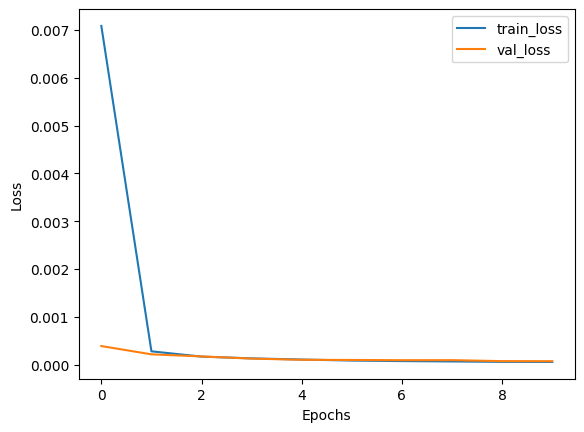

In [63]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
# Function to calculate Intersection over Union (IoU)
def calculate_iou(real_bbox, pred_bbox):
    # Extract the bounding box coordinates
    real_x_center, real_y_center, real_width, real_height = real_bbox
    pred_x_center, pred_y_center, pred_width, pred_height = pred_bbox

    # Convert the center, width, height to x_min, y_min, x_max, y_max
    real_x_min = real_x_center - real_width / 2
    real_y_min = real_y_center - real_height / 2
    real_x_max = real_x_center + real_width / 2
    real_y_max = real_y_center + real_height / 2

    pred_x_min = pred_x_center - pred_width / 2
    pred_y_min = pred_y_center - pred_height / 2
    pred_x_max = pred_x_center + pred_width / 2
    pred_y_max = pred_y_center + pred_height / 2

    # Calculate intersection
    inter_x_min = max(real_x_min, pred_x_min)
    inter_y_min = max(real_y_min, pred_y_min)
    inter_x_max = min(real_x_max, pred_x_max)
    inter_y_max = min(real_y_max, pred_y_max)

    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)

    # Calculate union
    real_area = (real_x_max - real_x_min) * (real_y_max - real_y_min)
    pred_area = (pred_x_max - pred_x_min) * (pred_y_max - pred_y_min)
    union_area = real_area + pred_area - inter_area

    # Calculate IoU
    iou = inter_area / union_area
    return iou

1/1 [==============================] - 0s 23ms/step


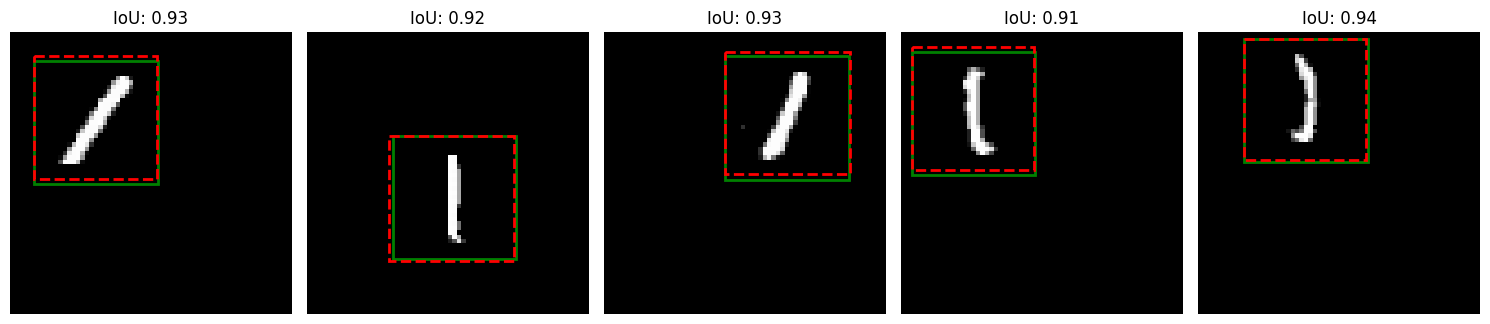

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Number of images to display
num_test_images = 5
random_indices = np.random.choice(len(X_test), num_test_images, replace=False)

# Set up the subplot grid
fig, axs = plt.subplots(1, num_test_images, figsize=(15, 5))
axs = axs.flatten()  # Flatten the axes array in case of a single row

for idx, i in enumerate(random_indices):
    image = X_test[i]
    real_bbox = y_test[i]

    # Predict using the trained model
    pred_bbox = model.predict(np.expand_dims(image, axis=0))[0]

    # Calculate IoU
    iou = calculate_iou(real_bbox, pred_bbox)

    # Plot the image in the appropriate subplot
    axs[idx].imshow(image.squeeze(), cmap='gray')

    # Plot the real bounding box
    real_x_center, real_y_center, real_width, real_height = real_bbox
    real_x_min = int((real_x_center - real_width / 2) * large_image_size)
    real_y_min = int((real_y_center - real_height / 2) * large_image_size)
    real_rect = plt.Rectangle((real_x_min, real_y_min), real_width * large_image_size, real_height * large_image_size, edgecolor='green', facecolor='none', linewidth=2, label='Real')
    axs[idx].add_patch(real_rect)

    # Plot the predicted bounding box
    pred_x_center, pred_y_center, pred_width, pred_height = pred_bbox
    pred_x_min = int((pred_x_center - pred_width / 2) * large_image_size)
    pred_y_min = int((pred_y_center - pred_height / 2) * large_image_size)
    pred_rect = plt.Rectangle((pred_x_min, pred_y_min), pred_width * large_image_size, pred_height * large_image_size, edgecolor='red', facecolor='none', linewidth=2, linestyle='--', label='Predicted')
    axs[idx].add_patch(pred_rect)

    # Add title with IoU
    axs[idx].set_title(f'IoU: {iou:.2f}')
    axs[idx].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Case 2

Consider images with backgrounds that do not contain the object (digit) of interest. In this case, the images will have a black background, and the presence confidence (`pc`) for these images will be `0`. We will need to adjust the model and the data handling to accommodate this setup:

1. **Dataset Preparation:**
   - **Image Content:** The dataset will include images where some have black backgrounds (no digit) and some contain the digit with a bounding box.
   - **Labels:** Each image will have two labels:
     - **Presence Confidence (`pc`):** A binary label where `1` indicates the presence of the digit and `0` indicates its absence.
     - **Bounding Box Coordinates:** The coordinates for the bounding box if the digit is present. For images with `pc = 0`, this will be a placeholder or set to zeros.

2. **Model Architecture:**
   - The model will have two outputs:
     - **Classification Output:** A sigmoid activation function to predict `pc` with binary cross-entropy loss.
     - **Regression Output:** To predict the bounding box coordinates (if `pc` is `1`), using mean squared error (MSE) loss.

3. **Training:**
   - During training, the model will learn to output the presence confidence and, if the digit is present, predict the bounding box coordinates.
   - The model will be trained with a combined loss function:
     - **Classification Loss:** Binary Cross-Entropy Loss for the presence confidence.
     - **Regression Loss:** Mean Squared Error for the bounding box coordinates.

4. **Evaluation:**
   - The model will be evaluated on a test set that includes both images with and without the object.
   - Metrics include accuracy for classification and IoU (Intersection over Union) for bounding box predictions when `pc` is `1`.

5. **Visualization:**
   - After training, the model's predictions will be compared against the actual labels. Images where the predicted `pc` does not match the actual `pc` will be visualized to understand the model's performance and errors.


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Concatenate
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError

# Load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Define the larger image size and small image size (MNIST)
large_image_size = 64
small_image_size = 28

# Function to generate black images with pc = 0 and images with digit and pc = 1
def generate_samples(digit_images, num_black_images=1000):
    num_digits = digit_images.shape[0]
    num_samples = num_digits + num_black_images

    images = np.zeros((num_samples, large_image_size, large_image_size), dtype=np.float32)
    labels = np.zeros((num_samples, 5), dtype=np.float32)  # pc + bbox

    # Add digit images
    for i in range(num_digits):
        digit_image = digit_images[i]
        image, bbox = place_digit_on_background(digit_image)
        images[i] = image / 255.0
        labels[i] = np.array([1] + bbox)  # pc = 1, followed by bbox

    # Add black images
    for i in range(num_digits, num_samples):
        images[i] = np.zeros((large_image_size, large_image_size), dtype=np.float32)
        labels[i] = np.array([0, 0, 0, 0, 0])  # pc = 0, bbox = [0, 0, 0, 0]

    return images, labels

# Create dataset with both digit and black images
digit_images = x_train[y_train == 1]
X, y = generate_samples(digit_images)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for the CNN (add channel dimension)
X_train = X_train.reshape(-1, large_image_size, large_image_size, 1)
X_test = X_test.reshape(-1, large_image_size, large_image_size, 1)

# Build the CNN model with two tasks
input_layer = Input(shape=(large_image_size, large_image_size, 1))

# Shared convolutional layers
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)

# Classification output
classification_output = Dense(1, activation='sigmoid', name='classification')(x)

# Bounding box output
bbox_output = Dense(4, name='bbox')(x)

# Build and compile the model
model = Model(inputs=input_layer, outputs=[classification_output, bbox_output])
model.compile(optimizer='adam',
              loss={'classification': BinaryCrossentropy(), 'bbox': MeanSquaredError()},
              loss_weights={'classification': 1.0, 'bbox': 1.0},
              metrics={'classification': 'accuracy'})

# Train the model
history = model.fit(X_train, {'classification': y_train[:, 0], 'bbox': y_train[:, 1:]},
                    epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
155/155 [==============================] - 3s 14ms/step - loss: 0.1461 - classification_loss: 0.1322 - bbox_loss: 0.0139 - classification_accuracy: 0.9372 - val_loss: 0.0885 - val_classification_loss: 0.0860 - val_bbox_loss: 0.0025 - val_classification_accuracy: 1.0000
Epoch 2/10
155/155 [==============================] - 2s 13ms/step - loss: 0.0848 - classification_loss: 0.0829 - bbox_loss: 0.0020 - classification_accuracy: 1.0000 - val_loss: 0.0808 - val_classification_loss: 0.0792 - val_bbox_loss: 0.0016 - val_classification_accuracy: 1.0000
Epoch 3/10
155/155 [==============================] - 2s 13ms/step - loss: 0.0775 - classification_loss: 0.0760 - bbox_loss: 0.0014 - classification_accuracy: 1.0000 - val_loss: 0.0738 - val_classification_loss: 0.0726 - val_bbox_loss: 0.0012 - val_classification_accuracy: 1.0000
Epoch 4/10
155/155 [==============================] - 2s 13ms/step - loss: 0.0709 - classification_loss: 0.0696 - bbox_loss: 0.0013 - classification_accuracy

49/49 [==============================] - 0s 5ms/step - loss: 0.0403 - classification_loss: 0.0398 - bbox_loss: 5.4097e-04 - classification_accuracy: 1.0000
Evaluation Results:
loss: 0.04032375290989876
classification_loss: 0.03978279232978821
bbox_loss: 0.0005409695440903306
classification_accuracy: 1.0
Test Classification Loss: 0.03978279232978821
Test Bounding Box Loss: 0.0005409695440903306


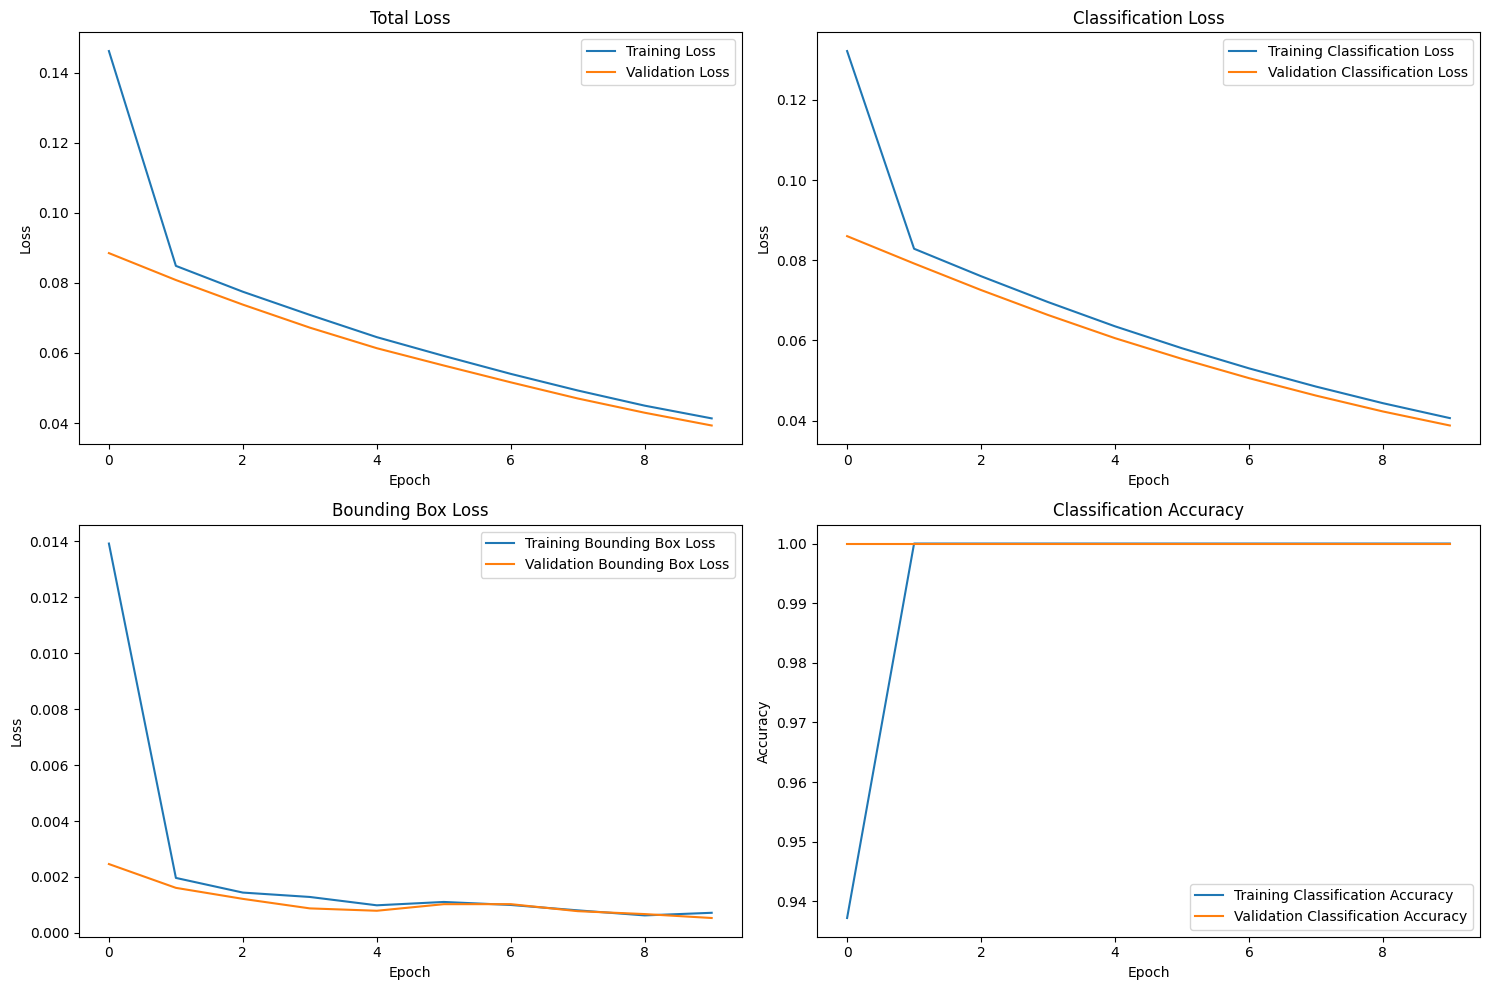

In [67]:
# Evaluate the model on the test set
eval_results = model.evaluate(X_test, {'classification': y_test[:, 0], 'bbox': y_test[:, 1:]}, verbose=1)

# Print all evaluation metrics
print('Evaluation Results:')
for metric, value in zip(model.metrics_names, eval_results):
    print(f'{metric}: {value}')

# Optionally, if you want to specifically print the classification and bounding box loss:
test_classification_loss = eval_results[model.metrics_names.index('classification_loss')]
test_bbox_loss = eval_results[model.metrics_names.index('bbox_loss')]

print(f'Test Classification Loss: {test_classification_loss}')
print(f'Test Bounding Box Loss: {test_bbox_loss}')


# Plot training & validation loss values
plt.figure(figsize=(15, 10))

# Plot Classification Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Classification Loss
plt.subplot(2, 2, 2)
plt.plot(history.history['classification_loss'], label='Training Classification Loss')
plt.plot(history.history['val_classification_loss'], label='Validation Classification Loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Bounding Box Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['bbox_loss'], label='Training Bounding Box Loss')
plt.plot(history.history['val_bbox_loss'], label='Validation Bounding Box Loss')
plt.title('Bounding Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Classification Accuracy
plt.subplot(2, 2, 4)
plt.plot(history.history['classification_accuracy'], label='Training Classification Accuracy')
plt.plot(history.history['val_classification_accuracy'], label='Validation Classification Accuracy')
plt.title('Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
# Function to calculate Intersection over Union (IoU)
def calculate_iou(real_bbox, pred_bbox):
    # Extract the bounding box coordinates
    real_x_center, real_y_center, real_width, real_height = real_bbox
    pred_x_center, pred_y_center, pred_width, pred_height = pred_bbox

    # Convert the center, width, height to x_min, y_min, x_max, y_max
    real_x_min = real_x_center - real_width / 2
    real_y_min = real_y_center - real_height / 2
    real_x_max = real_x_center + real_width / 2
    real_y_max = real_y_center + real_height / 2

    pred_x_min = pred_x_center - pred_width / 2
    pred_y_min = pred_y_center - pred_height / 2
    pred_x_max = pred_x_center + pred_width / 2
    pred_y_max = pred_y_center + pred_height / 2

    # Calculate intersection
    inter_x_min = max(real_x_min, pred_x_min)
    inter_y_min = max(real_y_min, pred_y_min)
    inter_x_max = min(real_x_max, pred_x_max)
    inter_y_max = min(real_y_max, pred_y_max)

    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)

    # Calculate union
    real_area = (real_x_max - real_x_min) * (real_y_max - real_y_min)
    pred_area = (pred_x_max - pred_x_min) * (pred_y_max - pred_y_min)
    union_area = real_area + pred_area - inter_area

    # Calculate IoU
    iou = inter_area / union_area if union_area != 0 else 0
    return iou


1/1 [==============================] - 0s 24ms/step


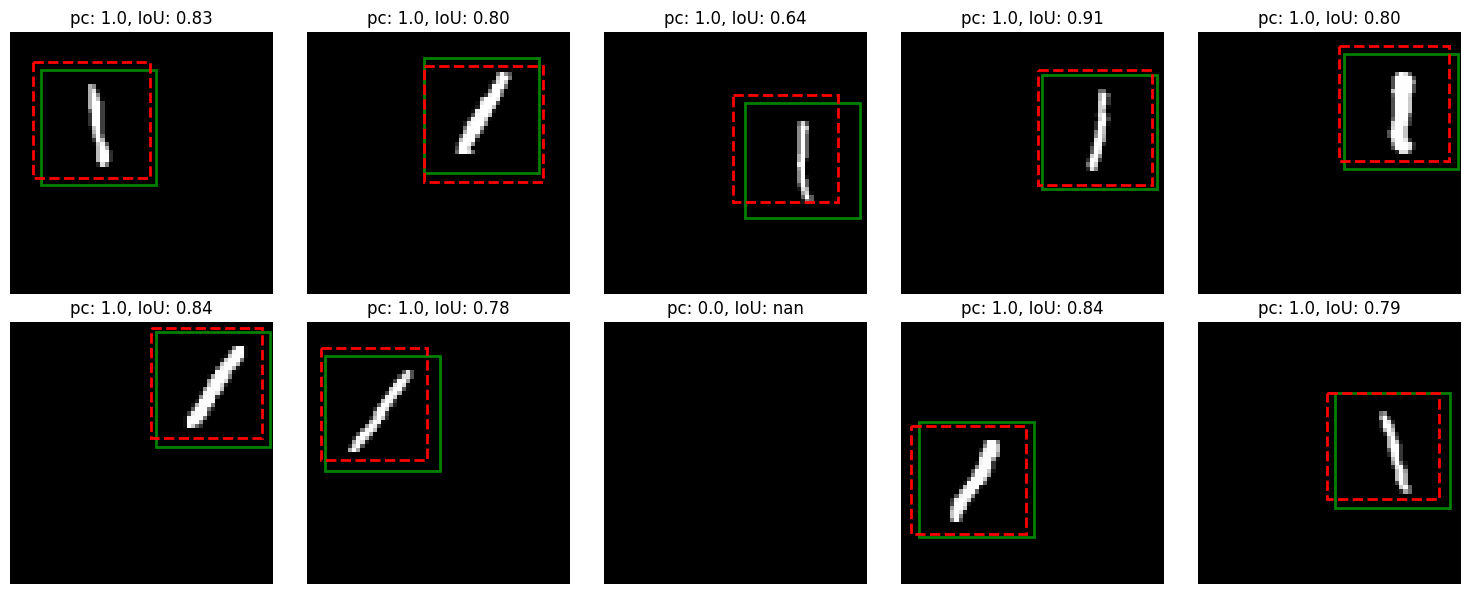

In [69]:
# Number of images to display
num_test_images = 10
random_indices = np.random.choice(len(X_test), num_test_images, replace=False)

# Set up the subplot grid
rows = 2
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
axs = axs.flatten()

for idx, i in enumerate(random_indices):
    image = X_test[i]
    real_bbox = y_test[i, 1:]
    real_pc = y_test[i, 0]

    # Predict using the trained model
    pred_pc, pred_bbox = model.predict(np.expand_dims(image, axis=0))
    pred_pc, pred_bbox = pred_pc[0][0], pred_bbox[0]

    # Calculate IoU if pc > 0
    iou = calculate_iou(real_bbox, pred_bbox) if real_pc > 0 else float('nan')

    # Plot the image in the appropriate subplot
    axs[idx].imshow(image.squeeze(), cmap='gray')

    # Plot the real bounding box if pc > 0
    if real_pc > 0:
        real_x_center, real_y_center, real_width, real_height = real_bbox
        real_x_min = int((real_x_center - real_width / 2) * large_image_size)
        real_y_min = int((real_y_center - real_height / 2) * large_image_size)
        real_rect = plt.Rectangle((real_x_min, real_y_min), real_width * large_image_size, real_height * large_image_size, edgecolor='green', facecolor='none', linewidth=2, label='Real')
        axs[idx].add_patch(real_rect)

    # Plot the predicted bounding box if pc > 0
    if pred_pc > 0.5:  # Apply threshold for the predicted pc
        pred_x_center, pred_y_center, pred_width, pred_height = pred_bbox
        pred_x_min = int((pred_x_center - pred_width / 2) * large_image_size)
        pred_y_min = int((pred_y_center - pred_height / 2) * large_image_size)
        pred_rect = plt.Rectangle((pred_x_min, pred_y_min), pred_width * large_image_size, pred_height * large_image_size, edgecolor='red', facecolor='none', linewidth=2, linestyle='--', label='Predicted')
        axs[idx].add_patch(pred_rect)

    # Add title with IoU
    axs[idx].set_title(f"pc: {real_pc}, IoU: {iou:.2f}")
    axs[idx].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Case 3: Multi-Class Object Localization on MNIST Dataset

### Overview of Case 3

In this case, we consider all 10 classes of the MNIST dataset for the task of multi-class object localization. The objective is to locate and classify the digit within a larger black background image.

### Dataset Preparation

- **Image Content:** The dataset contains images where digits from all 10 classes (0 to 9) are randomly placed on a larger black background.
- **Labels:** Each image is annotated with:
  - **Class Label (`class`):** The digit class (0-9).
  - **Bounding Box Coordinates:** The coordinates (x_center, y_center, width, height) for the bounding box around the digit.

### One-Hot Encoding for Target Format

- **Class Label Encoding:** The class labels (0-9) are converted to a one-hot encoded format, where each class is represented by a binary vector. For example, the digit "3" would be represented as `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`. This encoding is used to train the classification output of the model with a categorical cross-entropy loss function.
  
  **Why One-Hot Encoding?** One-hot encoding is used to convert categorical labels into a format that can be used in classification algorithms. By transforming the class labels into a binary vector, the model can calculate the probability for each class, enabling it to output the most likely class for a given input.

### Model Architecture

The model is designed to perform two tasks: classify the digit and predict its location within the image.

- **Outputs:**
  - **Classification Output:** Predicts the digit class using a softmax activation function. The loss function for this output is categorical cross-entropy.
  - **Regression Output:** Predicts the bounding box coordinates for the digit using mean squared error (MSE) loss.

### Training

During training, the model learns to predict both the digit class and its bounding box in the image.

- **Combined Loss Function:**
  - **Classification Loss:** Categorical Cross-Entropy Loss is used to train the model to predict the correct class label.
  - **Regression Loss:** Mean Squared Error is used for the bounding box coordinate predictions.
  
  The total loss is a combination of these two losses, which allows the model to balance between accurate classification and precise localization.

### Evaluation

The model is evaluated on the test set using the following metrics:

- **Classification Accuracy:** Measures how well the model predicts the correct digit class.
- **Intersection over Union (IoU):** Evaluates the accuracy of the bounding box predictions by comparing the overlap between the predicted and the actual bounding boxes.

### Visualization

After training, the model's predictions can be visualized by comparing them against the actual labels. The visualizations will display:

- The predicted and actual bounding boxes on the images.
- The predicted class label alongside the real class label.

This approach allows you to visually inspect the model’s performance in both classification and localization tasks.


In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()

# Normalize images
X_train_full = X_train_full / 255.0
X_test_full = X_test_full / 255.0

# Function to place the digit image on a larger black background and return label
def place_digit_on_background(images, labels, large_image_size=64, small_image_size=28):
    num_images = images.shape[0]
    X_large = np.zeros((num_images, large_image_size, large_image_size))
    y_large = np.zeros((num_images, 5))  # [class, x_center, y_center, width, height]

    for i in range(num_images):
        x_offset = np.random.randint(0, large_image_size - small_image_size)
        y_offset = np.random.randint(0, large_image_size - small_image_size)

        X_large[i, y_offset:y_offset+small_image_size, x_offset:x_offset+small_image_size] = images[i]

        x_center = (x_offset + small_image_size / 2) / large_image_size
        y_center = (y_offset + small_image_size / 2) / large_image_size
        width = small_image_size / large_image_size
        height = small_image_size / large_image_size

        y_large[i, 0] = labels[i]
        y_large[i, 1:] = [x_center, y_center, width, height]

    return X_large, y_large

# Create large images with bounding boxes
large_image_size = 64
X_train, y_train = place_digit_on_background(X_train_full, y_train_full, large_image_size)
X_test, y_test = place_digit_on_background(X_test_full, y_test_full, large_image_size)

# One-hot encode the class labels
y_train_class = to_categorical(y_train[:, 0], num_classes=10)
y_test_class = to_categorical(y_test[:, 0], num_classes=10)

# Separate bounding box labels
y_train_bbox = y_train[:, 1:]
y_test_bbox = y_test[:, 1:]


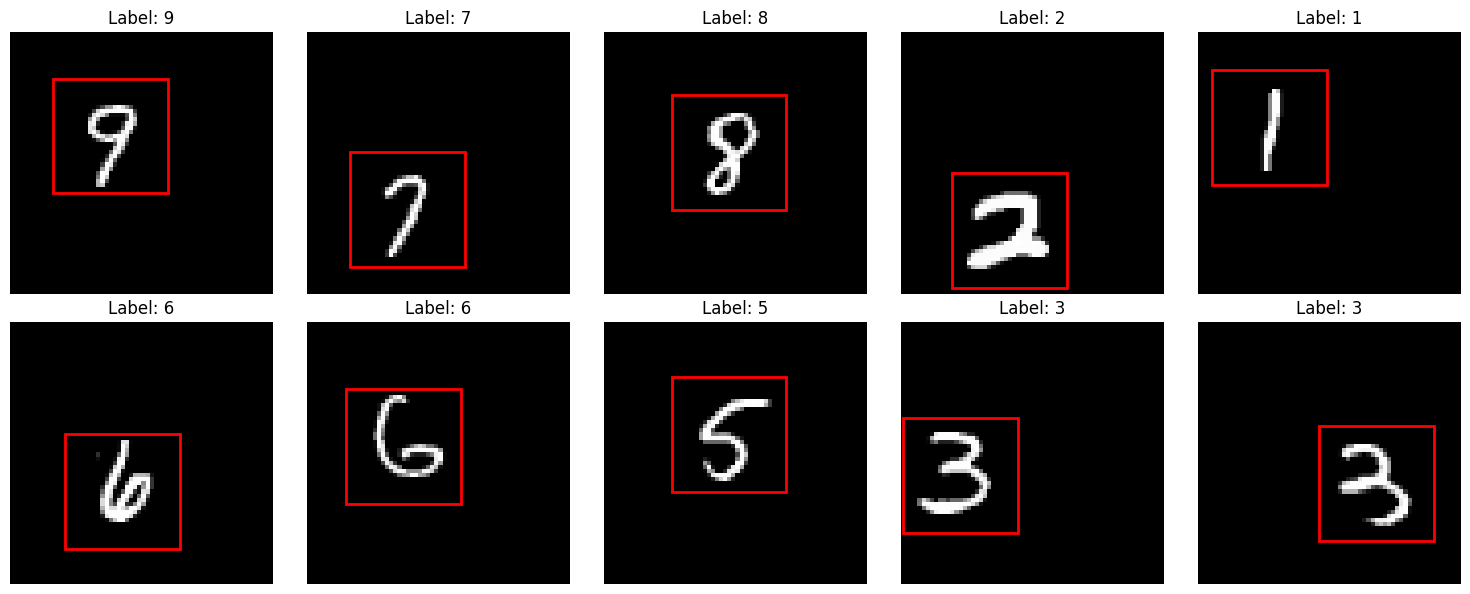

In [71]:
# Number of samples to visualize
num_samples = 10

# Randomly select indices for the samples
random_indices = np.random.choice(len(X_train), num_samples, replace=False)

# Set up the subplot grid
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

# Loop through the selected indices and plot the images with bounding boxes
for idx, i in enumerate(random_indices):
    image = X_train[i]
    label = int(y_train[i, 0])  # The digit class label
    bbox = y_train[i, 1:]  # The bounding box coordinates

    # Convert normalized bbox coordinates back to image scale
    x_center, y_center, width, height = bbox
    x_min = int((x_center - width / 2) * large_image_size)
    y_min = int((y_center - height / 2) * large_image_size)
    rect_width = int(width * large_image_size)
    rect_height = int(height * large_image_size)

    # Plot the image
    axs[idx].imshow(image, cmap='gray')

    # Plot the bounding box
    rect = plt.Rectangle((x_min, y_min), rect_width, rect_height,
                         edgecolor='red', facecolor='none', linewidth=2)
    axs[idx].add_patch(rect)

    # Add the label as the title
    axs[idx].set_title(f"Label: {label}")
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [72]:
from tensorflow.keras import layers, models

# Define the model
input_layer = layers.Input(shape=(large_image_size, large_image_size, 1))

# Convolutional layers
conv1 = layers.Conv2D(16, (3, 3), activation='relu')(input_layer)
pool1 = layers.MaxPooling2D((2, 2))(conv1)
conv2 = layers.Conv2D(32, (3, 3), activation='relu')(pool1)
pool2 = layers.MaxPooling2D((2, 2))(conv2)
conv3 = layers.Conv2D(64, (3, 3), activation='relu')(pool2)
pool3 = layers.MaxPooling2D((2, 2))(conv3)

# Flatten the output
flatten = layers.Flatten()(pool3)

# Fully connected layers for classification
fc_class = layers.Dense(128, activation='relu')(flatten)
output_class = layers.Dense(10, activation='softmax', name='class')(fc_class)

# Fully connected layers for bounding box regression
fc_bbox = layers.Dense(128, activation='relu')(flatten)
output_bbox = layers.Dense(4, activation='sigmoid', name='bbox')(fc_bbox)

# Define the model with two outputs
model = models.Model(inputs=input_layer, outputs=[output_class, output_bbox])

# Compile the model
model.compile(optimizer='adam',
              loss={'class': 'categorical_crossentropy', 'bbox': 'mse'},
              metrics={'class': 'accuracy'})


In [73]:
# Train the model
history = model.fit(X_train,
                    {'class': y_train_class, 'bbox': y_train_bbox},
                    validation_data=(X_test, {'class': y_test_class, 'bbox': y_test_bbox}),
                    epochs=10,
                    batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.4457 - class_loss: 0.4453 - bbox_loss: 3.7178e-04 - class_accuracy: 0.8512 - val_loss: 0.1420 - val_class_loss: 0.1419 - val_bbox_loss: 1.6645e-04 - val_class_accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1105 - class_loss: 0.1104 - bbox_loss: 1.5535e-04 - class_accuracy: 0.9655 - val_loss: 0.0983 - val_class_loss: 0.0982 - val_bbox_loss: 1.6403e-04 - val_class_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0659 - class_loss: 0.0658 - bbox_loss: 1.3639e-04 - class_accuracy: 0.9791 - val_loss: 0.0831 - val_class_loss: 0.0829 - val_bbox_loss: 1.4412e-04 - val_class_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0431 - class_loss: 0.0430 - bbox_loss: 1.2077e-04 - class_accuracy: 0.9856 - val_loss: 0.0913 - val_class_loss: 0.0912 - val_bbox_loss: 1.2688e-04 - val

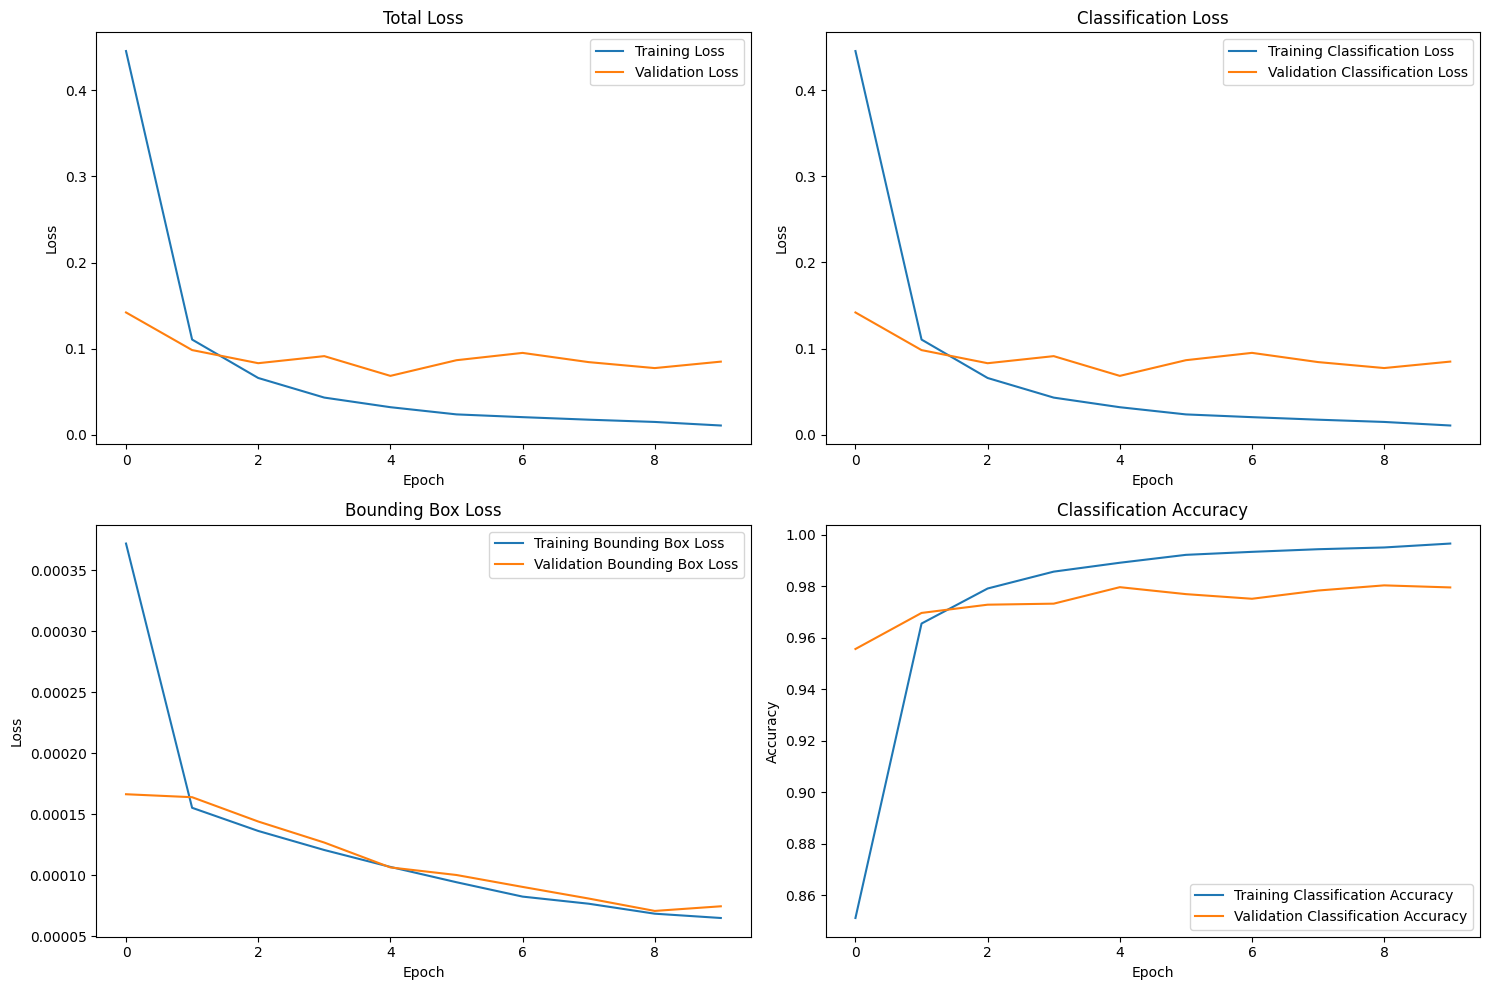

In [74]:
# Plot training & validation loss values
plt.figure(figsize=(15, 10))

# Plot Total Loss (Combined Loss for Both Tasks)
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Classification Loss
plt.subplot(2, 2, 2)
plt.plot(history.history['class_loss'], label='Training Classification Loss')
plt.plot(history.history['val_class_loss'], label='Validation Classification Loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Bounding Box Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['bbox_loss'], label='Training Bounding Box Loss')
plt.plot(history.history['val_bbox_loss'], label='Validation Bounding Box Loss')
plt.title('Bounding Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Classification Accuracy
plt.subplot(2, 2, 4)
plt.plot(history.history['class_accuracy'], label='Training Classification Accuracy')
plt.plot(history.history['val_class_accuracy'], label='Validation Classification Accuracy')
plt.title('Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 25ms/step


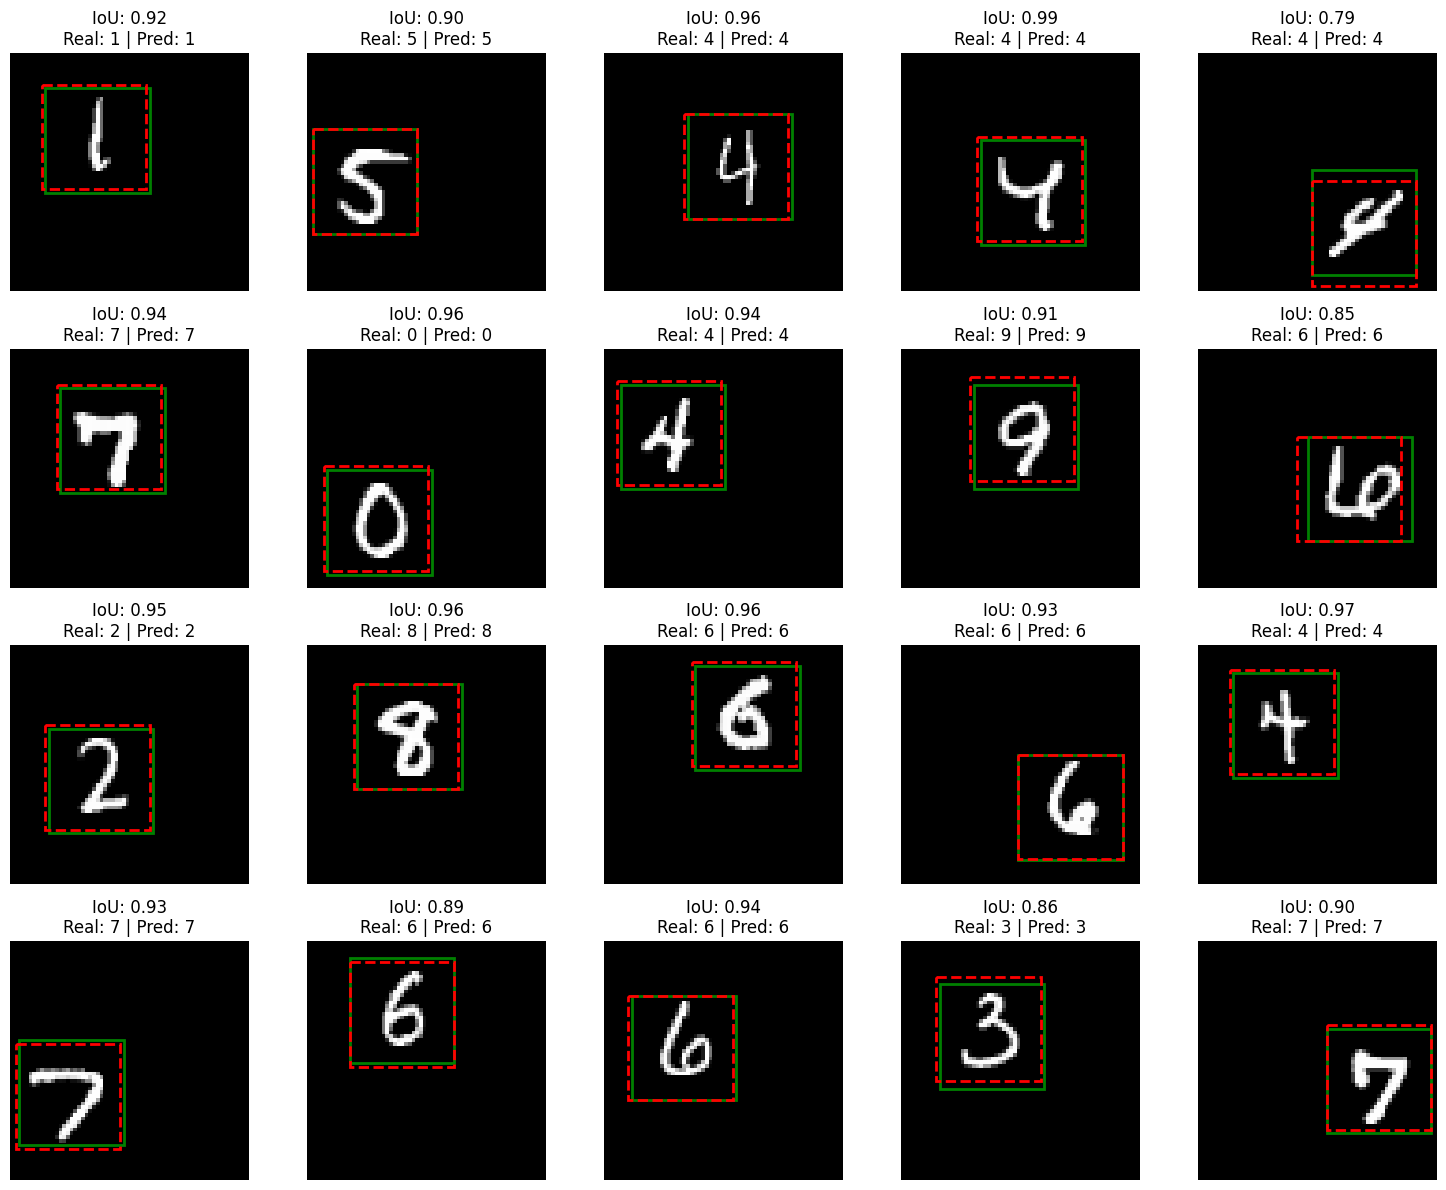

In [75]:
# Number of test images to visualize
num_test_images = 20
random_indices = np.random.choice(len(X_test), num_test_images, replace=False)

# Set up the subplot grid
fig, axs = plt.subplots(4, 5, figsize=(15, 12))
axs = axs.flatten()

for idx, i in enumerate(random_indices):
    image = X_test[i]
    real_class = np.argmax(y_test_class[i])
    real_bbox = y_test_bbox[i]

    # Predict using the trained model
    pred_class, pred_bbox = model.predict(np.expand_dims(image, axis=0))
    pred_class = np.argmax(pred_class[0])
    pred_bbox = pred_bbox[0]

    # Calculate IoU
    iou = calculate_iou(real_bbox, pred_bbox)

    # Plot the image
    axs[idx].imshow(image.squeeze(), cmap='gray')

    # Plot the real bounding box
    real_x_center, real_y_center, real_width, real_height = real_bbox
    real_x_min = int((real_x_center - real_width / 2) * large_image_size)
    real_y_min = int((real_y_center - real_height / 2) * large_image_size)
    real_rect = plt.Rectangle((real_x_min, real_y_min), real_width * large_image_size, real_height * large_image_size, edgecolor='green', facecolor='none', linewidth=2, label=f'Real: {real_class}')
    axs[idx].add_patch(real_rect)

    # Plot the predicted bounding box
    pred_x_center, pred_y_center, pred_width, pred_height = pred_bbox
    pred_x_min = int((pred_x_center - pred_width / 2) * large_image_size)
    pred_y_min = int((pred_y_center - pred_height / 2) * large_image_size)
    pred_rect = plt.Rectangle((pred_x_min, pred_y_min), pred_width * large_image_size, pred_height * large_image_size, edgecolor='red', facecolor='none', linewidth=2, linestyle='--', label=f'Pred: {pred_class}')
    axs[idx].add_patch(pred_rect)

    # Add title with IoU and predicted class
    axs[idx].set_title(f'IoU: {iou:.2f}\nReal: {real_class} | Pred: {pred_class}')
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


## Case 4: Multi-Class Object Localization with Two Classes

### Overview of Case 4

In this case, we consider two specific classes from the MNIST dataset. The objective is to detect the presence of these two classes within an image, which may contain:

1. Both classes present in the image.
2. Only one of the two classes present.
3. No classes present (an empty image).

### Dataset Preparation

- **Image Content:** The dataset contains images where either:
  - Both selected classes are randomly placed on a larger black background.
  - Only one class is randomly placed on the background.
  - The background is entirely empty (no digits).
  
- **Labels:** Each image is annotated with:
  - **Presence Class (`Pc`):** A categorical label with three possible values:
    - **Class 0:** Indicates no objects are present in the image (empty).
    - **Class 1:** Indicates only one of the two classes is present.
    - **Class 2:** Indicates both classes are present.
  - **Bounding Box Coordinates:** If objects are present, the coordinates (x_center, y_center, width, height) for each digit are provided.

### Model Architecture

The model is designed to handle multi-class classification and regression tasks:

- **Outputs:**
  - **Presence Classification Output (`Pc`):** A softmax activation function to predict the presence of 0, 1, or 2 classes in the image. The loss function for this output is categorical cross-entropy.
  - **Regression Output:** Predicts the bounding box coordinates for each present digit using mean squared error (MSE) loss.

### Training

During training, the model learns to predict both the presence of classes and the bounding boxes for any detected digits.

- **Combined Loss Function:**
  - **Classification Loss:** Categorical Cross-Entropy Loss is used for the `Pc` label to determine whether the image is empty, contains one digit, or contains two digits.
  - **Regression Loss:** Mean Squared Error is used for the bounding box coordinates of the present digits.

  The total loss is a combination of these losses, balancing the need for accurate classification with precise localization.

### Evaluation

The model is evaluated on the test set using the following metrics:

- **Presence Classification Accuracy:** Measures how well the model predicts whether the image is empty, contains one digit, or contains two digits.
- **Intersection over Union (IoU):** Evaluates the accuracy of the bounding box predictions by comparing the overlap between the predicted and the actual bounding boxes.

### Visualization

After training, the model's predictions can be visualized by comparing them against the actual labels. The visualizations will display:

- The predicted and actual bounding boxes on the images.
- The predicted class label (`Pc`) alongside the real label.

This approach allows you to visually inspect the model’s performance in both presence classification and localization tasks.

### Notes on Multi-Class Handling

- **Handling Multiple Bounding Boxes:** Since an image can contain up to two digits, the model must predict multiple bounding boxes. The regression output should be designed to output two sets of bounding box coordinates, one for each class.
  
- **Training Considerations:** When training, ensure that the model correctly identifies empty images and those with one or two digits. You might want to balance the dataset to ensure that each of the three cases (empty, one digit, two digits) is well-represented.



In [76]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import random

# Load MNIST data
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# Select two classes, e.g., 1 and 7
selected_classes = [1, 7]

# Filter dataset for selected classes
train_filter = np.isin(y_train_full, selected_classes)
X_train, y_train = X_train_full[train_filter], y_train_full[train_filter]

test_filter = np.isin(y_test_full, selected_classes)
X_test, y_test = X_test_full[test_filter], y_test_full[test_filter]

# Parameters
small_image_size = 28
large_image_size = 56
num_samples = len(X_train)
num_test_samples = len(X_test)

def create_image_with_multiple_classes(X, y, large_image_size, small_image_size, selected_classes):
    large_image = np.zeros((large_image_size, large_image_size), dtype=np.uint8)
    boxes = []
    labels = []

    for class_id in selected_classes:
        if random.random() > 0.5:  # Randomly decide if this class should be in the image
            idx = np.random.choice(np.where(y == class_id)[0])
            small_image = X[idx]

            # Random position
            x_offset = np.random.randint(0, large_image_size - small_image_size)
            y_offset = np.random.randint(0, large_image_size - small_image_size)

            # Place small image in the large image
            large_image[y_offset:y_offset+small_image_size, x_offset:x_offset+small_image_size] = small_image

            # Calculate bounding box (normalized)
            x_center = (x_offset + small_image_size / 2) / large_image_size
            y_center = (y_offset + small_image_size / 2) / large_image_size
            width = small_image_size / large_image_size
            height = small_image_size / large_image_size
            boxes.append([x_center, y_center, width, height])
            labels.append(class_id)

    if len(boxes) == 0:
        return large_image, 0, [0, 0, 0, 0], [0, 0, 0, 0]
    elif len(boxes) == 1:
        return large_image, 1, boxes[0], [0, 0, 0, 0]
    else:
        return large_image, 2, boxes[0], boxes[1]

# Create the dataset
X_train_large = np.zeros((num_samples, large_image_size, large_image_size), dtype=np.uint8)
y_train_pc = np.zeros((num_samples, 3))
y_train_bbox = np.zeros((num_samples, 2, 4))

for i in range(num_samples):
    large_image, pc, bbox1, bbox2 = create_image_with_multiple_classes(X_train, y_train, large_image_size, small_image_size, selected_classes)
    X_train_large[i] = large_image
    y_train_pc[i, pc] = 1
    y_train_bbox[i, 0] = bbox1
    y_train_bbox[i, 1] = bbox2

# Repeat for test data
X_test_large = np.zeros((num_test_samples, large_image_size, large_image_size), dtype=np.uint8)
y_test_pc = np.zeros((num_test_samples, 3))
y_test_bbox = np.zeros((num_test_samples, 2, 4))

for i in range(num_test_samples):
    large_image, pc, bbox1, bbox2 = create_image_with_multiple_classes(X_test, y_test, large_image_size, small_image_size, selected_classes)
    X_test_large[i] = large_image
    y_test_pc[i, pc] = 1
    y_test_bbox[i, 0] = bbox1
    y_test_bbox[i, 1] = bbox2


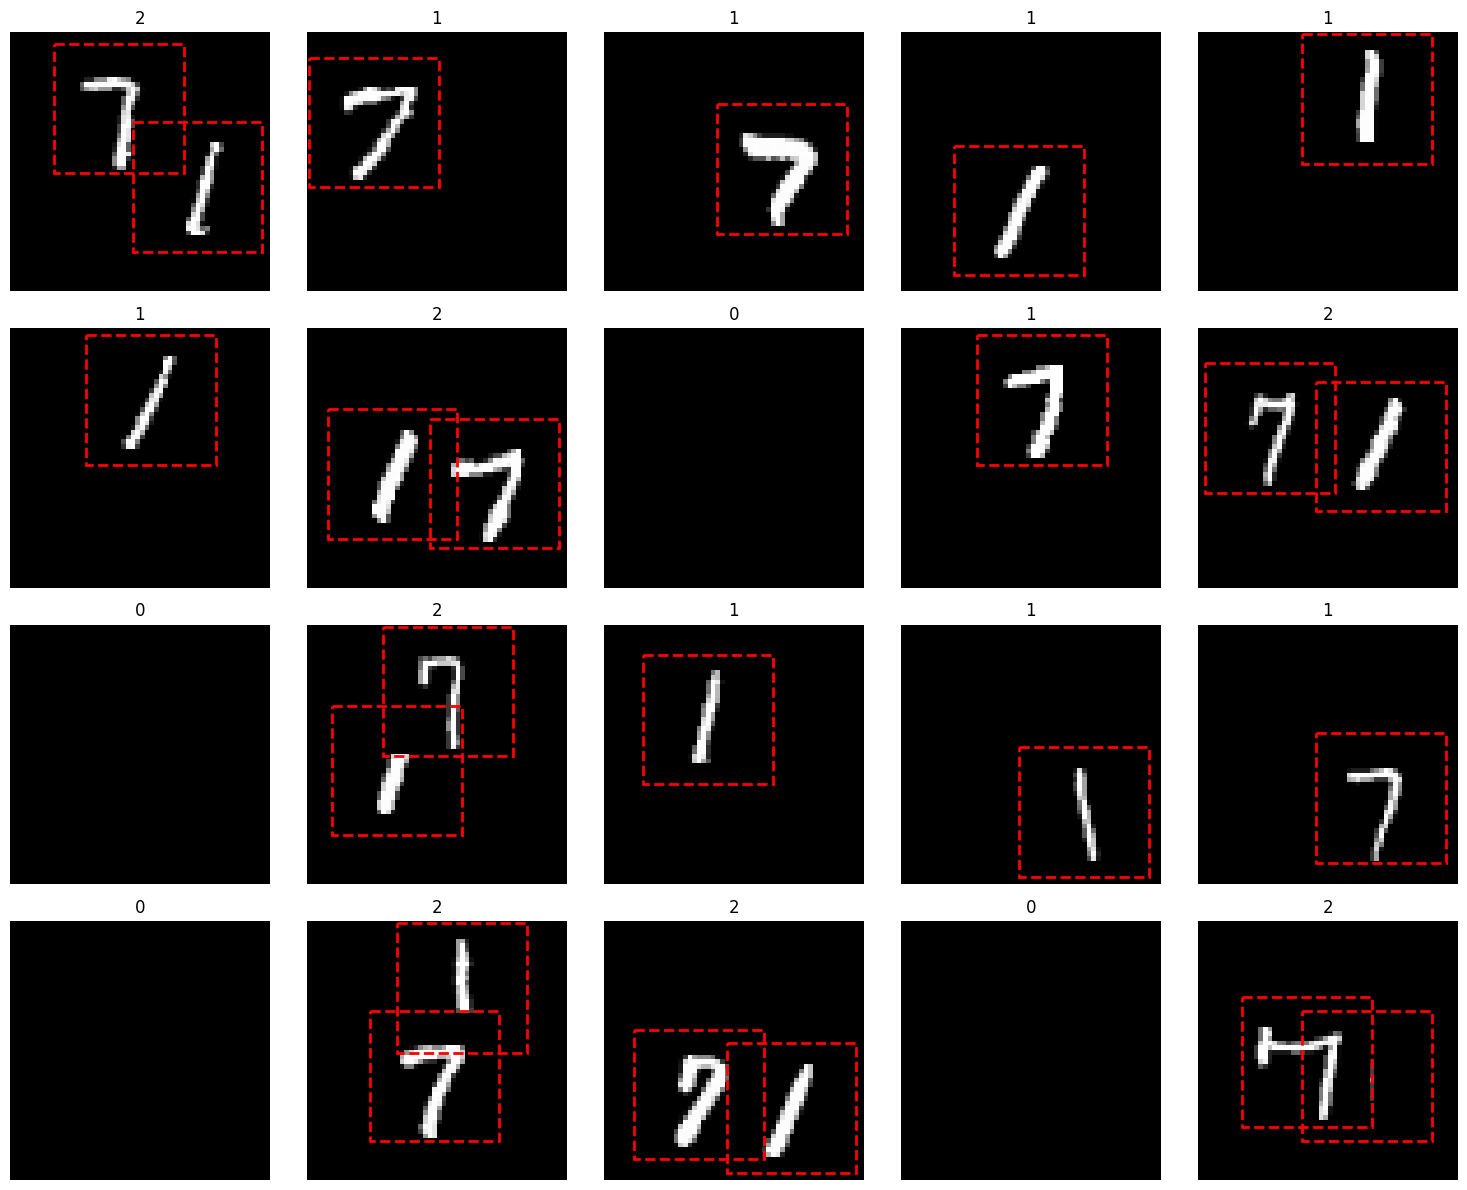

In [77]:
# Function to plot images with bounding boxes
def plot_images_with_boxes(X, y_class, y_bbox, num_images=20, image_size=(56, 56), small_image_size=28):
    indices = np.random.choice(len(X), num_images, replace=False)

    fig, axs = plt.subplots(4, 5, figsize=(15, 12))
    axs = axs.flatten()

    for idx, i in enumerate(indices):
        image = X[i]
        class_labels = y_class[i]
        bbox = y_bbox[i]

        # Plot the image
        axs[idx].imshow(image.squeeze(), cmap='gray')

        # Plot the bounding boxes
        for obj in range(len(bbox)):
            if np.any(bbox[obj]):  # If bounding box has non-zero values
                x_center, y_center, width, height = bbox[obj]
                x_min = int((x_center - width / 2) * image_size[1])
                y_min = int((y_center - height / 2) * image_size[0])
                rect_width = width * image_size[1]
                rect_height = height * image_size[0]

                rect = plt.Rectangle((x_min, y_min), rect_width, rect_height, edgecolor='red', facecolor='none', linewidth=2, linestyle='--')
                axs[idx].add_patch(rect)

        # Set title with labels
        labels = [str(i) for i, label in enumerate(class_labels) if label > 0]
        axs[idx].set_title(', '.join(labels) if labels else 'No Class')
        axs[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot 20 images
plot_images_with_boxes(X_train_large, y_train_pc, y_train_bbox, num_images=20, image_size=(large_image_size, large_image_size), small_image_size=small_image_size)

In [78]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Model definition
def create_model(large_image_size):
    input_layer = Input(shape=(large_image_size, large_image_size, 1))

    x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)

    # Classification output
    class_output = layers.Dense(64, activation='relu')(x)
    class_output = layers.Dense(3, activation='softmax', name='class_output')(class_output)

    # Bounding box output for two objects
    bbox_output_1 = layers.Dense(128, activation='relu')(x)
    bbox_output_1 = layers.Dense(4, name='bbox_output_1')(bbox_output_1)

    bbox_output_2 = layers.Dense(128, activation='relu')(x)
    bbox_output_2 = layers.Dense(4, name='bbox_output_2')(bbox_output_2)

    model = models.Model(inputs=input_layer, outputs=[class_output, bbox_output_1, bbox_output_2])
    return model

model = create_model(large_image_size)
model.compile(optimizer='adam',
              loss={'class_output': 'categorical_crossentropy',
                    'bbox_output_1': 'mse',
                    'bbox_output_2': 'mse'},
              metrics={'class_output': 'accuracy'})

model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 56, 56, 1)]          0         []                            
                                                                                                  
 conv2d_30 (Conv2D)          (None, 54, 54, 32)           320       ['input_8[0][0]']             
                                                                                                  
 max_pooling2d_30 (MaxPooli  (None, 27, 27, 32)           0         ['conv2d_30[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_31 (Conv2D)          (None, 25, 25, 64)           18496     ['max_pooling2d_30[0][0]

In [79]:
# Expand dimensions to match the model input
X_train_expanded = np.expand_dims(X_train_large, axis=-1)
X_test_expanded = np.expand_dims(X_test_large, axis=-1)

history = model.fit(X_train_expanded,
                    {'class_output': y_train_pc, 'bbox_output_1': y_train_bbox[:, 0], 'bbox_output_2': y_train_bbox[:, 1]},
                    validation_data=(X_test_expanded, {'class_output': y_test_pc, 'bbox_output_1': y_test_bbox[:, 0], 'bbox_output_2': y_test_bbox[:, 1]}),
                    epochs=10,
                    batch_size=32)


Epoch 1/10
407/407 [==============================] - 10s 20ms/step - loss: 5.7608 - class_output_loss: 0.4514 - bbox_output_1_loss: 2.7477 - bbox_output_2_loss: 2.5616 - class_output_accuracy: 0.8921 - val_loss: 0.2380 - val_class_output_loss: 0.2048 - val_bbox_output_1_loss: 0.0084 - val_bbox_output_2_loss: 0.0249 - val_class_output_accuracy: 0.9307
Epoch 2/10
407/407 [==============================] - 8s 19ms/step - loss: 0.2112 - class_output_loss: 0.1810 - bbox_output_1_loss: 0.0069 - bbox_output_2_loss: 0.0234 - class_output_accuracy: 0.9363 - val_loss: 0.2188 - val_class_output_loss: 0.1910 - val_bbox_output_1_loss: 0.0067 - val_bbox_output_2_loss: 0.0210 - val_class_output_accuracy: 0.9205
Epoch 3/10
407/407 [==============================] - 7s 18ms/step - loss: 0.1764 - class_output_loss: 0.1508 - bbox_output_1_loss: 0.0053 - bbox_output_2_loss: 0.0203 - class_output_accuracy: 0.9430 - val_loss: 0.2120 - val_class_output_loss: 0.1868 - val_bbox_output_1_loss: 0.0050 - val_bbo

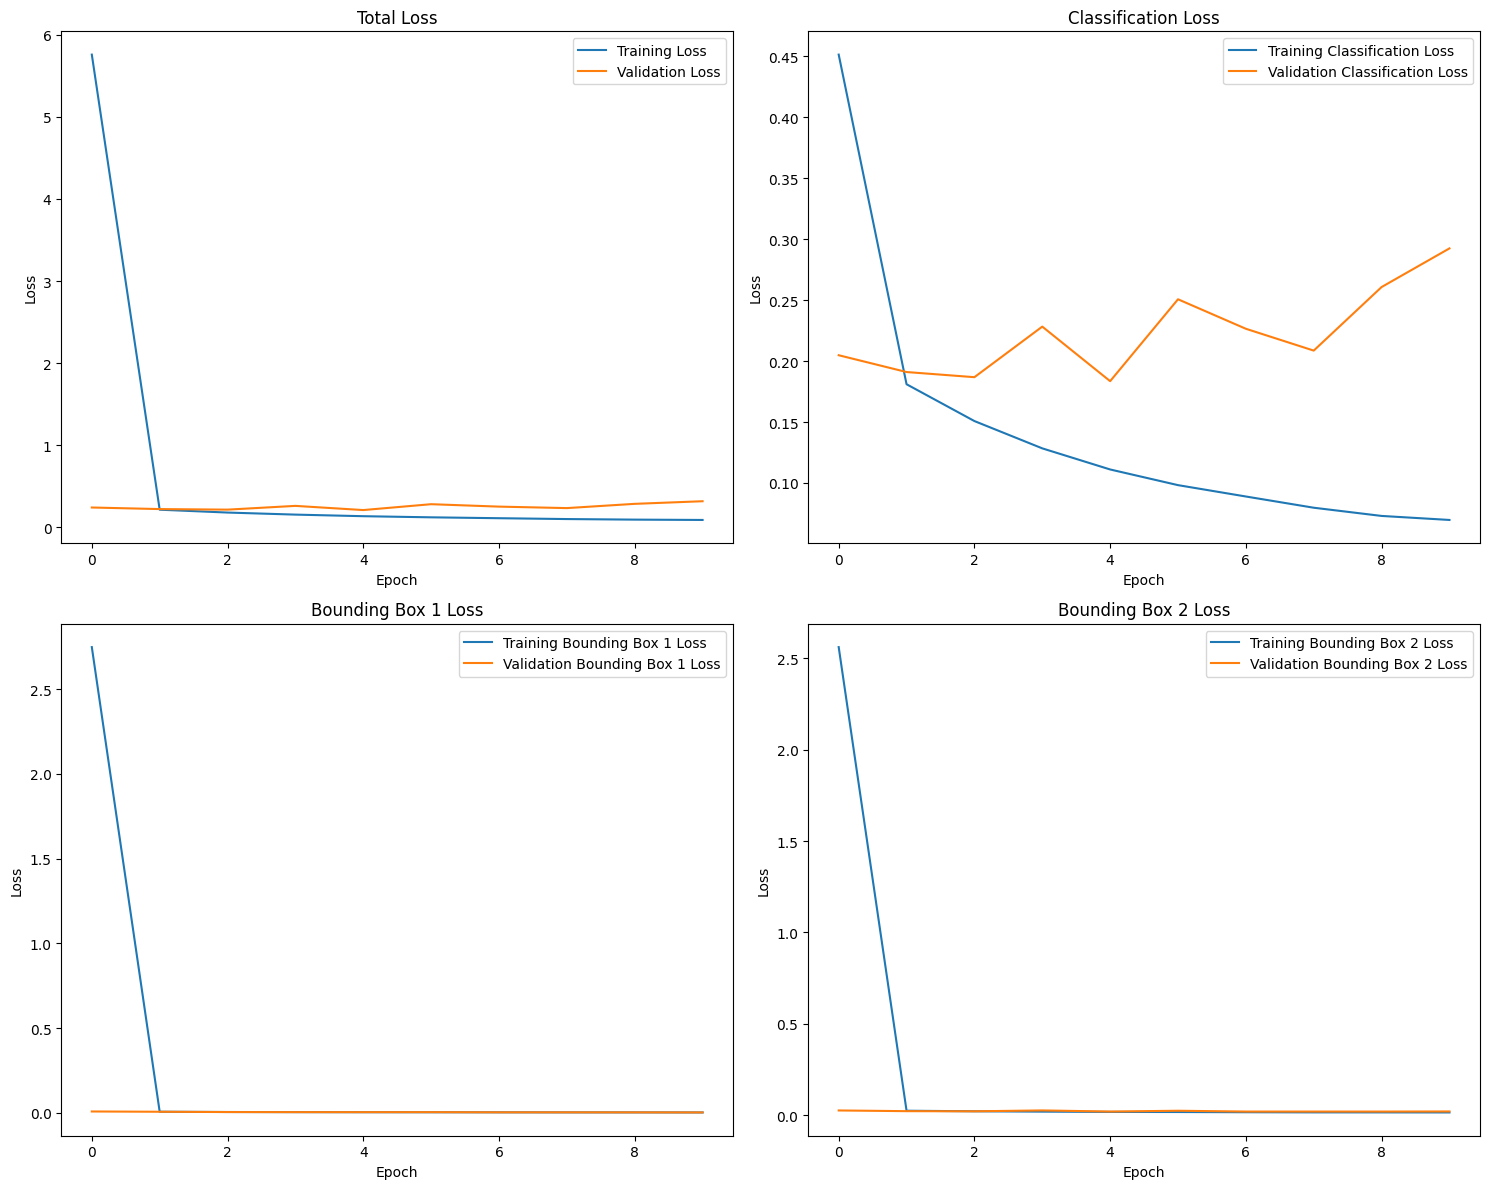

In [80]:
# Create subplots for loss and accuracy
plt.figure(figsize=(15, 12))

# Plot training & validation loss values
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot classification loss
plt.subplot(2, 2, 2)
plt.plot(history.history['class_output_loss'], label='Training Classification Loss')
plt.plot(history.history['val_class_output_loss'], label='Validation Classification Loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot bounding box 1 loss
plt.subplot(2, 2, 3)
plt.plot(history.history['bbox_output_1_loss'], label='Training Bounding Box 1 Loss')
plt.plot(history.history['val_bbox_output_1_loss'], label='Validation Bounding Box 1 Loss')
plt.title('Bounding Box 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot bounding box 2 loss
plt.subplot(2, 2, 4)
plt.plot(history.history['bbox_output_2_loss'], label='Training Bounding Box 2 Loss')
plt.plot(history.history['val_bbox_output_2_loss'], label='Validation Bounding Box 2 Loss')
plt.title('Bounding Box 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 26ms/step


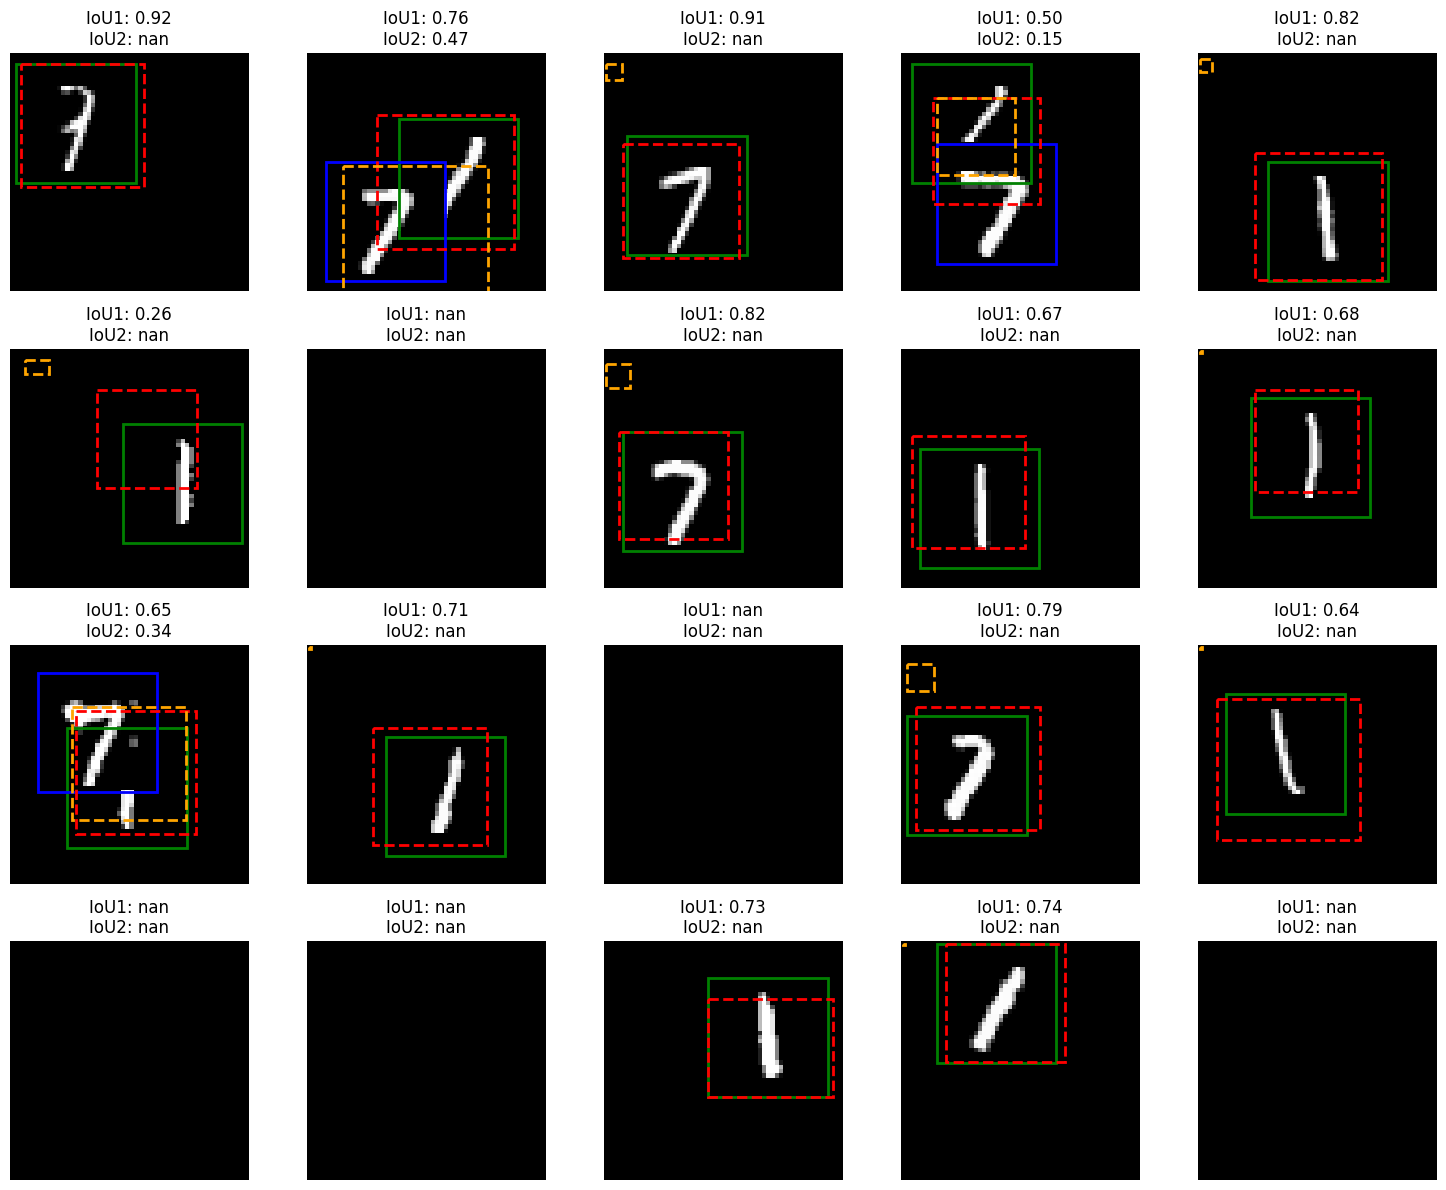

In [81]:
# Visualization
num_test_images = 20
random_indices = np.random.choice(len(X_test_expanded), num_test_images, replace=False)

fig, axs = plt.subplots(4, 5, figsize=(15, 12))
axs = axs.flatten()

for idx, i in enumerate(random_indices):
    image = X_test_expanded[i]
    real_pc = np.argmax(y_test_pc[i])
    real_bbox1 = y_test_bbox[i, 0]
    real_bbox2 = y_test_bbox[i, 1]

    # Predict using the trained model
    pred_pc, pred_bbox1, pred_bbox2 = model.predict(np.expand_dims(image, axis=0))
    pred_pc = np.argmax(pred_pc[0])
    pred_bbox1 = pred_bbox1[0]
    pred_bbox2 = pred_bbox2[0]

    # Calculate IoU
    iou1 = calculate_iou(real_bbox1, pred_bbox1) if real_pc > 0 else float('nan')
    iou2 = calculate_iou(real_bbox2, pred_bbox2) if real_pc > 1 else float('nan')

    # Plot the image
    axs[idx].imshow(image.squeeze(), cmap='gray')

    # Plot the real bounding boxes
    if real_pc > 0:
        real_x_center, real_y_center, real_width, real_height = real_bbox1
        real_x_min = int((real_x_center - real_width / 2) * large_image_size)
        real_y_min = int((real_y_center - real_height / 2) * large_image_size)
        real_rect = plt.Rectangle((real_x_min, real_y_min), real_width * large_image_size, real_height * large_image_size, edgecolor='green', facecolor='none', linewidth=2, label='Real 1')
        axs[idx].add_patch(real_rect)

        real_x_center, real_y_center, real_width, real_height = real_bbox2
        real_x_min = int((real_x_center - real_width / 2) * large_image_size)
        real_y_min = int((real_y_center - real_height / 2) * large_image_size)
        real_rect = plt.Rectangle((real_x_min, real_y_min), real_width * large_image_size, real_height * large_image_size, edgecolor='blue', facecolor='none', linewidth=2, label='Real 2')
        axs[idx].add_patch(real_rect)

    # Plot the predicted bounding boxes
    if pred_pc > 0:
        pred_x_center, pred_y_center, pred_width, pred_height = pred_bbox1
        pred_x_min = int((pred_x_center - pred_width / 2) * large_image_size)
        pred_y_min = int((pred_y_center - pred_height / 2) * large_image_size)
        pred_rect = plt.Rectangle((pred_x_min, pred_y_min), pred_width * large_image_size, pred_height * large_image_size, edgecolor='red', facecolor='none', linewidth=2, linestyle='--', label='Pred 1')
        axs[idx].add_patch(pred_rect)

        pred_x_center, pred_y_center, pred_width, pred_height = pred_bbox2
        pred_x_min = int((pred_x_center - pred_width / 2) * large_image_size)
        pred_y_min = int((pred_y_center - pred_height / 2) * large_image_size)
        pred_rect = plt.Rectangle((pred_x_min, pred_y_min), pred_width * large_image_size, pred_height * large_image_size, edgecolor='orange', facecolor='none', linewidth=2, linestyle='--', label='Pred 2')
        axs[idx].add_patch(pred_rect)

    # Add title with IoU
    axs[idx].set_title(f'IoU1: {iou1:.2f}\nIoU2: {iou2:.2f}')
    axs[idx].axis('off')

plt.tight_layout()
plt.show()